# Drawing XZ: focal area of an apheric lens

In [19]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

In [20]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 250


## lens

In [21]:
x0 = np.linspace(-250 * um, 250 * um, 1024 * 4)
z0 = np.linspace(-0.1 * mm, .6 * mm, 1024 * 4)
wavelength = 10 * um

In [22]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

In [23]:
lente2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lente2.aspheric_lens(r0=(0 * mm, 0 * mm),
                                    angle=(0 * degrees, (0 * mm, 0 * mm)),
                                    refraction_index=1.5,
                                    cx=(1 / (.25 * mm), -1 / (.25 * mm)),
                                    Qx=(0, 0),
                                    a2=(0, 1e-13),
                                    a3=(0, 0),
                                    a4=(0, 0),
                                    depth=.25 * mm,
                                    size=0.8 * mm)

lente2.slit(r0=(0, 100 * um),
            aperture=400 * um,
            depth=75 * um,
            refraction_index=1 + 2j)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

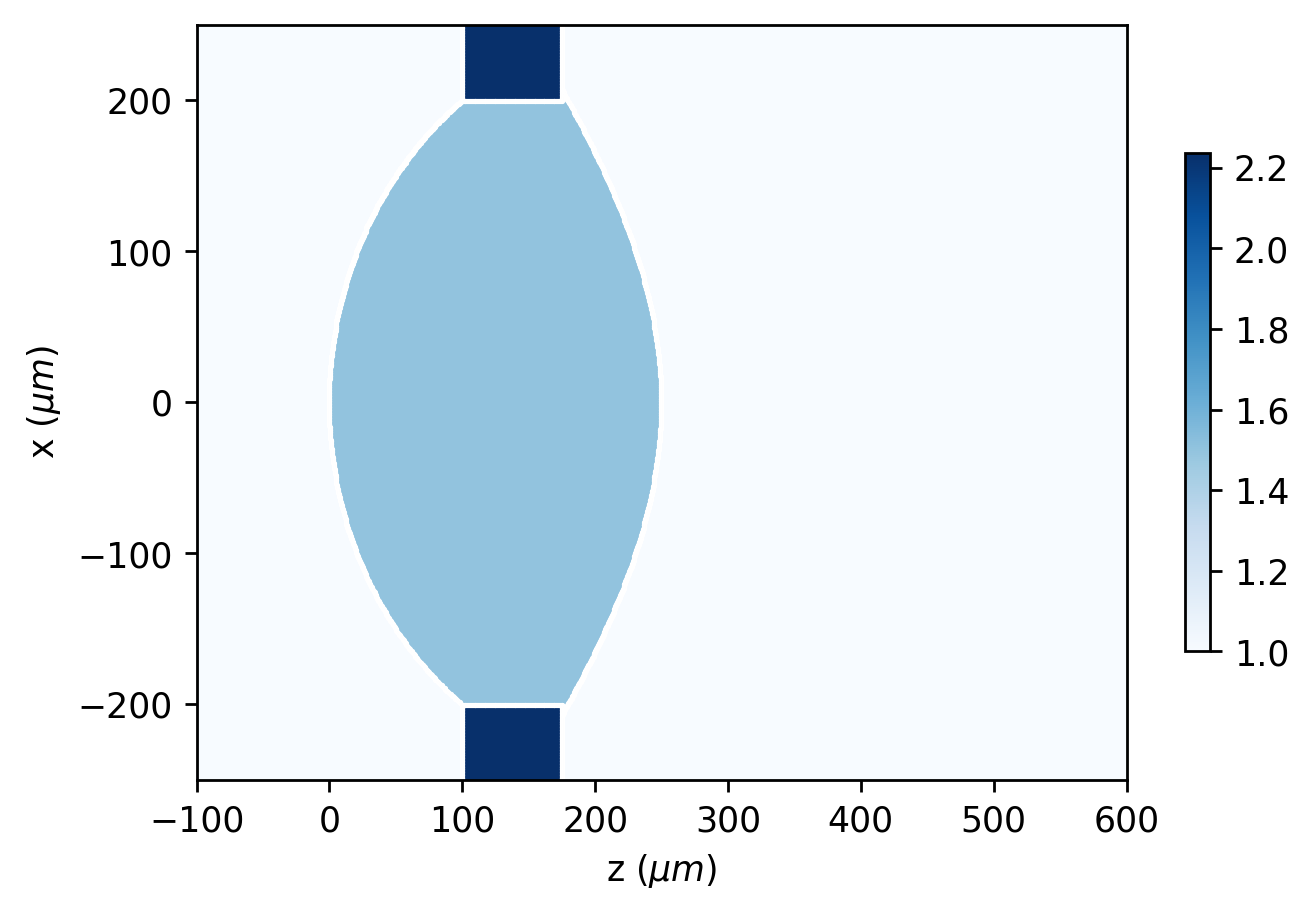

In [24]:
lente2.draw_refraction_index(draw_borders=True,
                             min_incr=0.01,
                             colorbar_kind='vertical')


In [25]:
lente2.incident_field(u0)

In [26]:
lente2.clear_field()
lente2.WPM(verbose=False, has_edges=False)

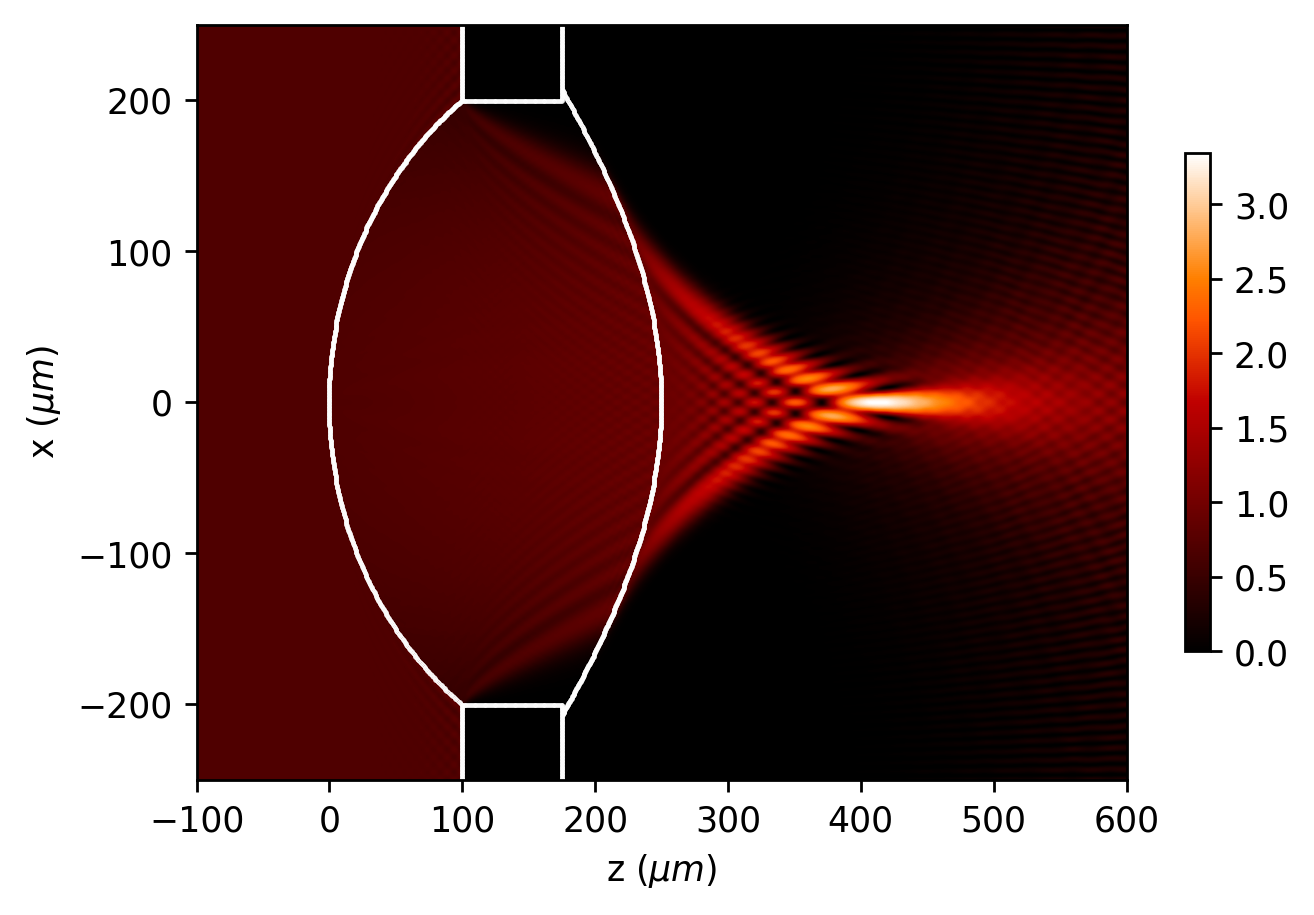

In [27]:
lente2.draw(kind='intensity',
            logarithm=True,
            draw_borders=True,
            colorbar_kind='vertical')


In [28]:
Intensity_WPM = lente2.intensity()

In [29]:
x_f, z_f = lente2.search_focus()


x = -0.061 um, z = 415.897 um


In [30]:
ylim_max = 50 * um
zlim_max = 100 * um


## Intensity

(315.8974358974359, 515.8974358974359)

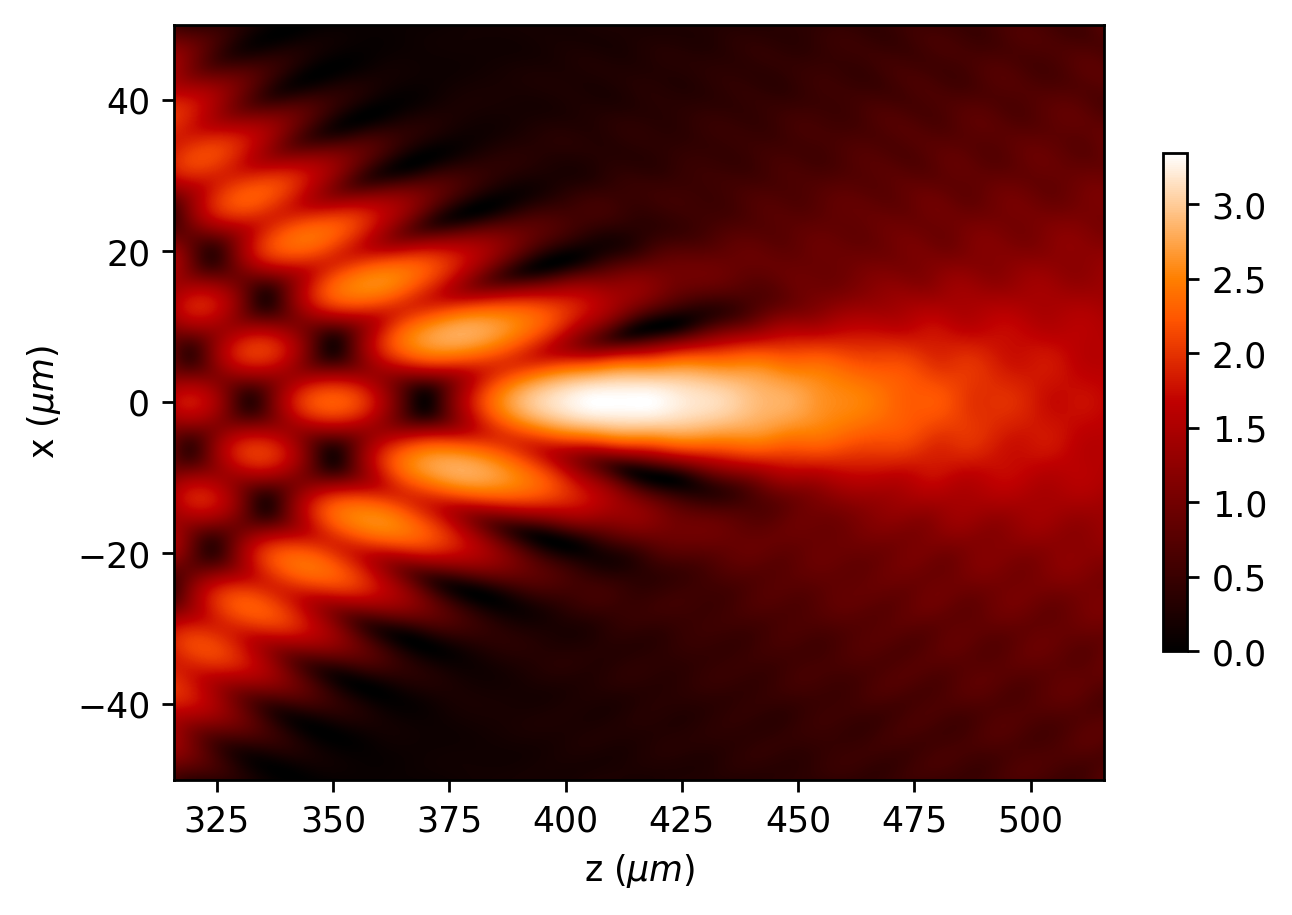

In [31]:
lente2.draw(kind='intensity', logarithm=True, colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


## Amplitude

(315.8974358974359, 515.8974358974359)

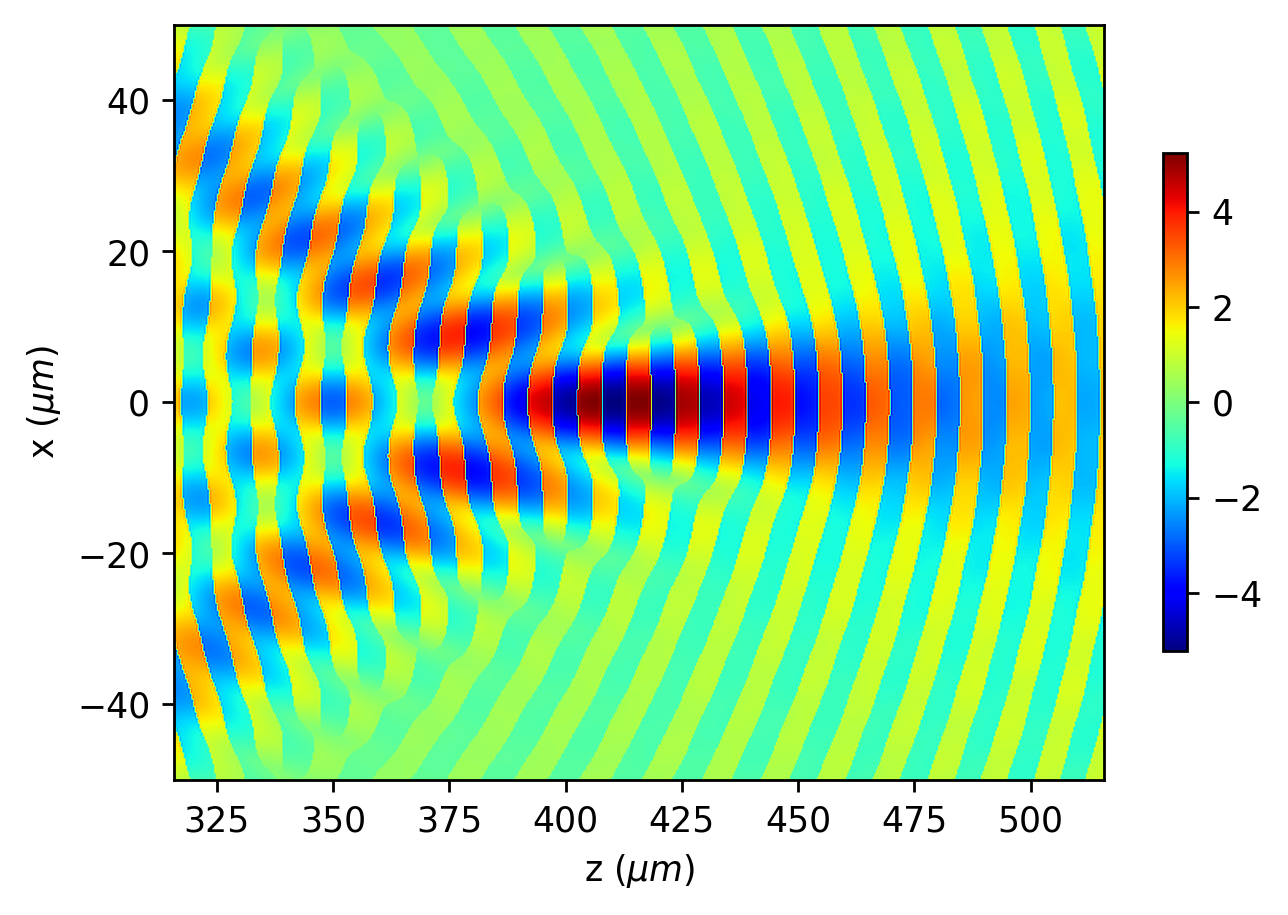

In [32]:
lente2.draw(kind='amplitude', colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


## Phase

(315.8974358974359, 515.8974358974359)

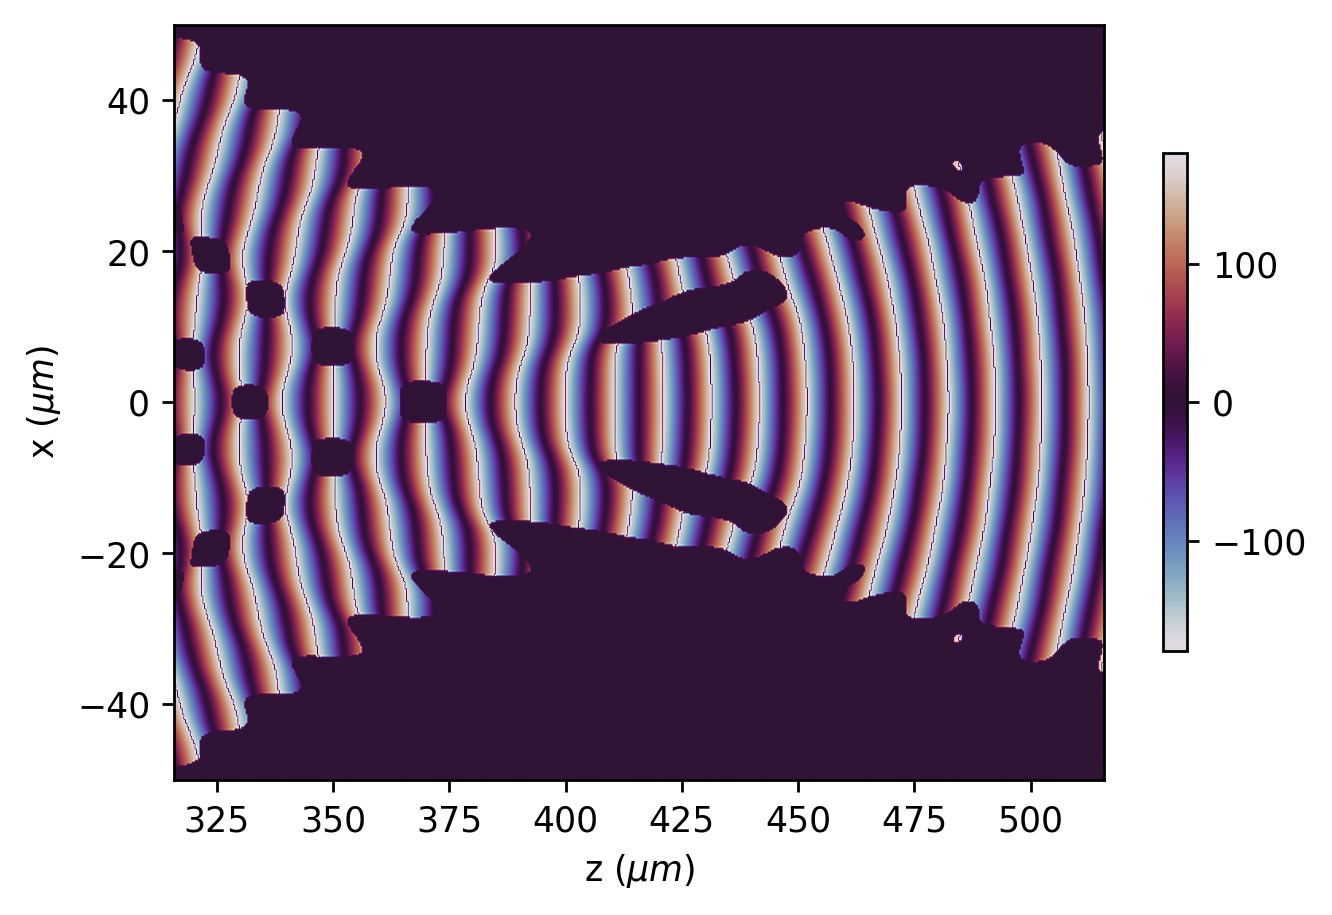

In [33]:
lente2.draw(kind='phase',
            draw_borders=True,
            colorbar_kind='vertical',
            percentage_intensity=0.05)
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


## Real

(315.8974358974359, 515.8974358974359)

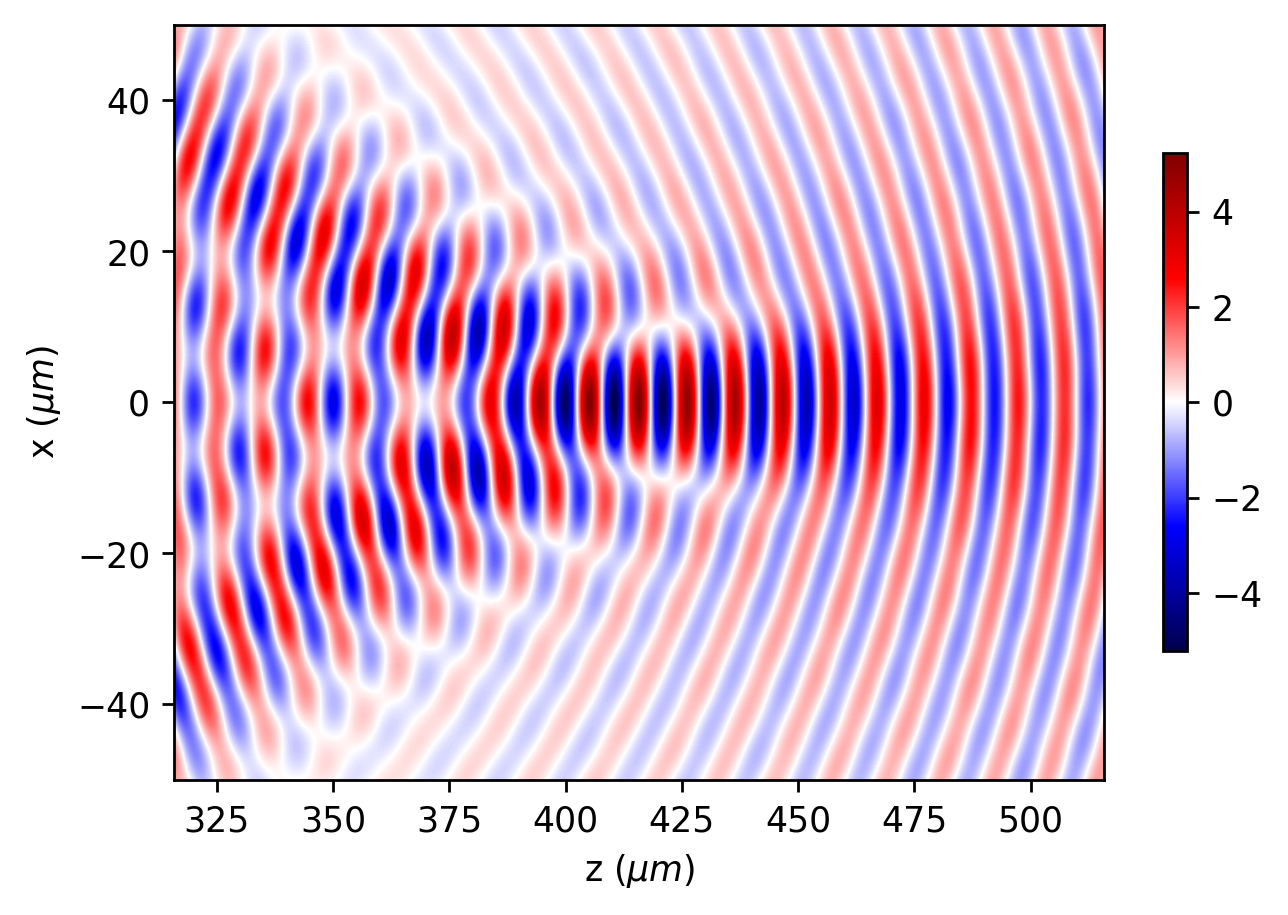

In [34]:
lente2.draw(kind='real', colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


array([1.        , 1.        , 1.        , ..., 0.64427176, 0.64427176,
       0.64427176])

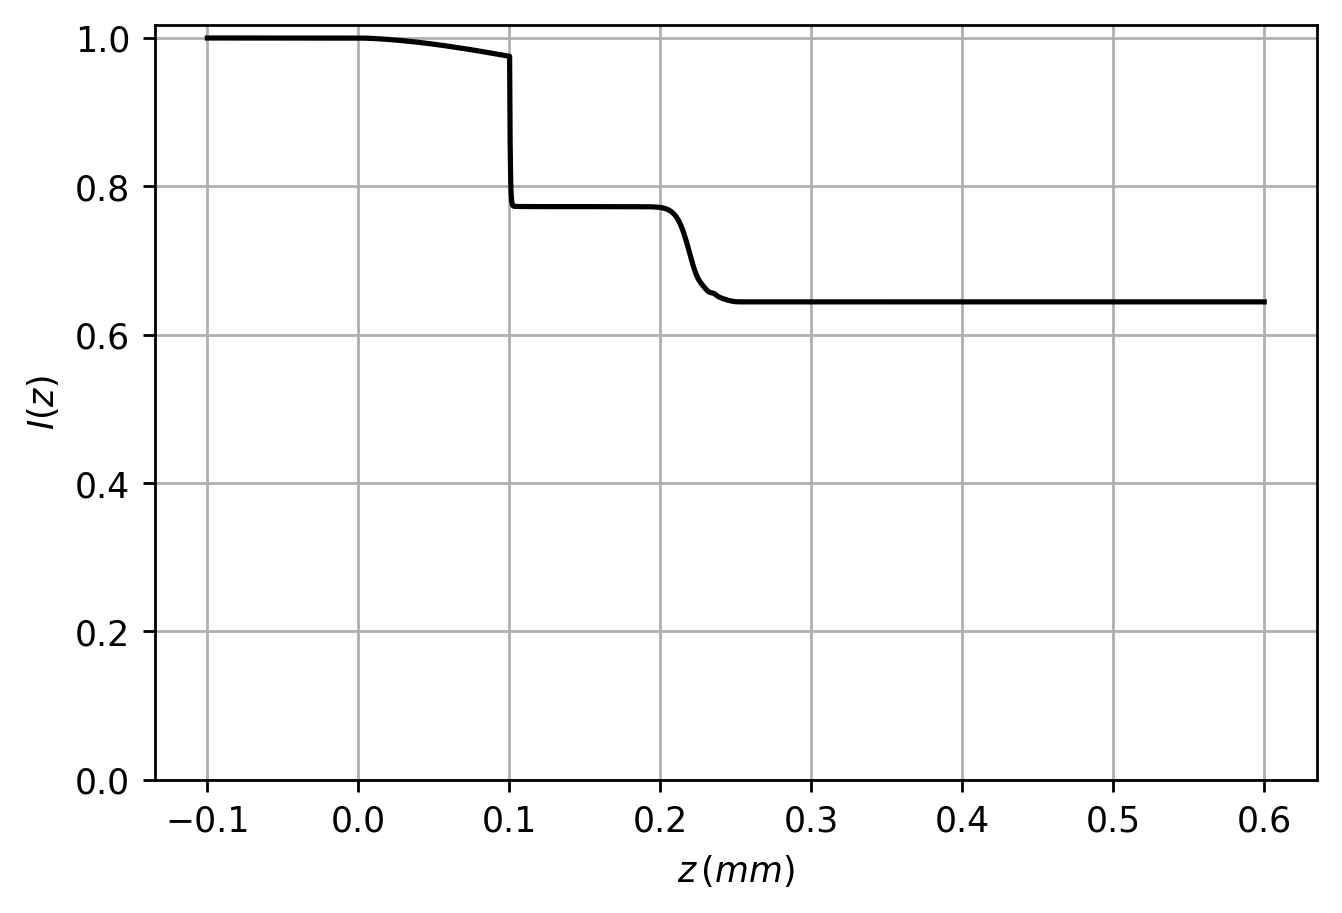

In [35]:
lente2.check_intensity()


### Longitudinal and transversal profiles

array([1.        , 1.        , 1.        , ..., 1.59396918, 1.61378395,
       1.63463669])

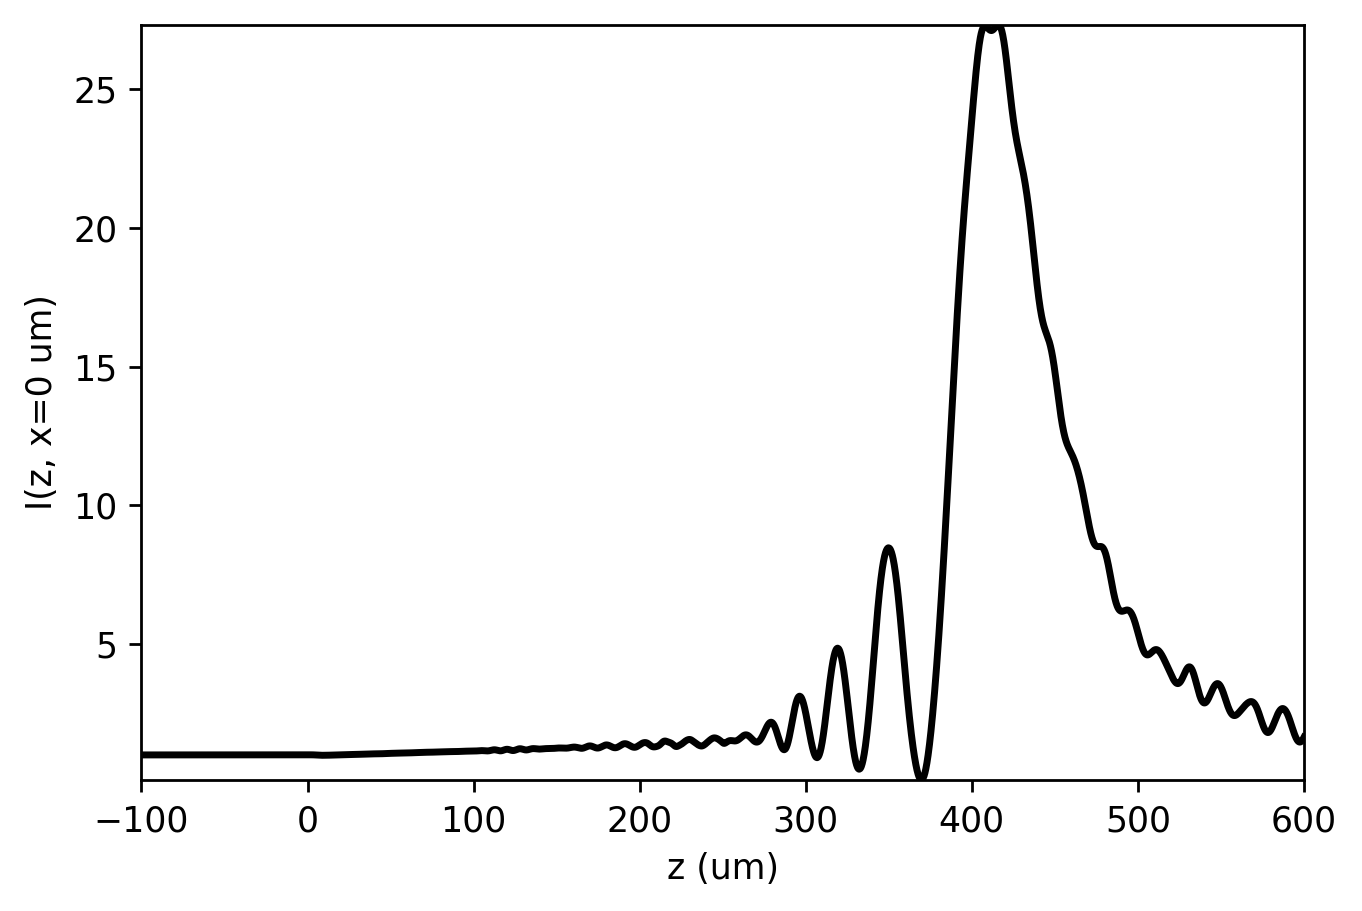

In [36]:
lente2.profile_longitudinal(kind='intensity', logarithm=False, x0=x_f)


(-100.0, 100.0)

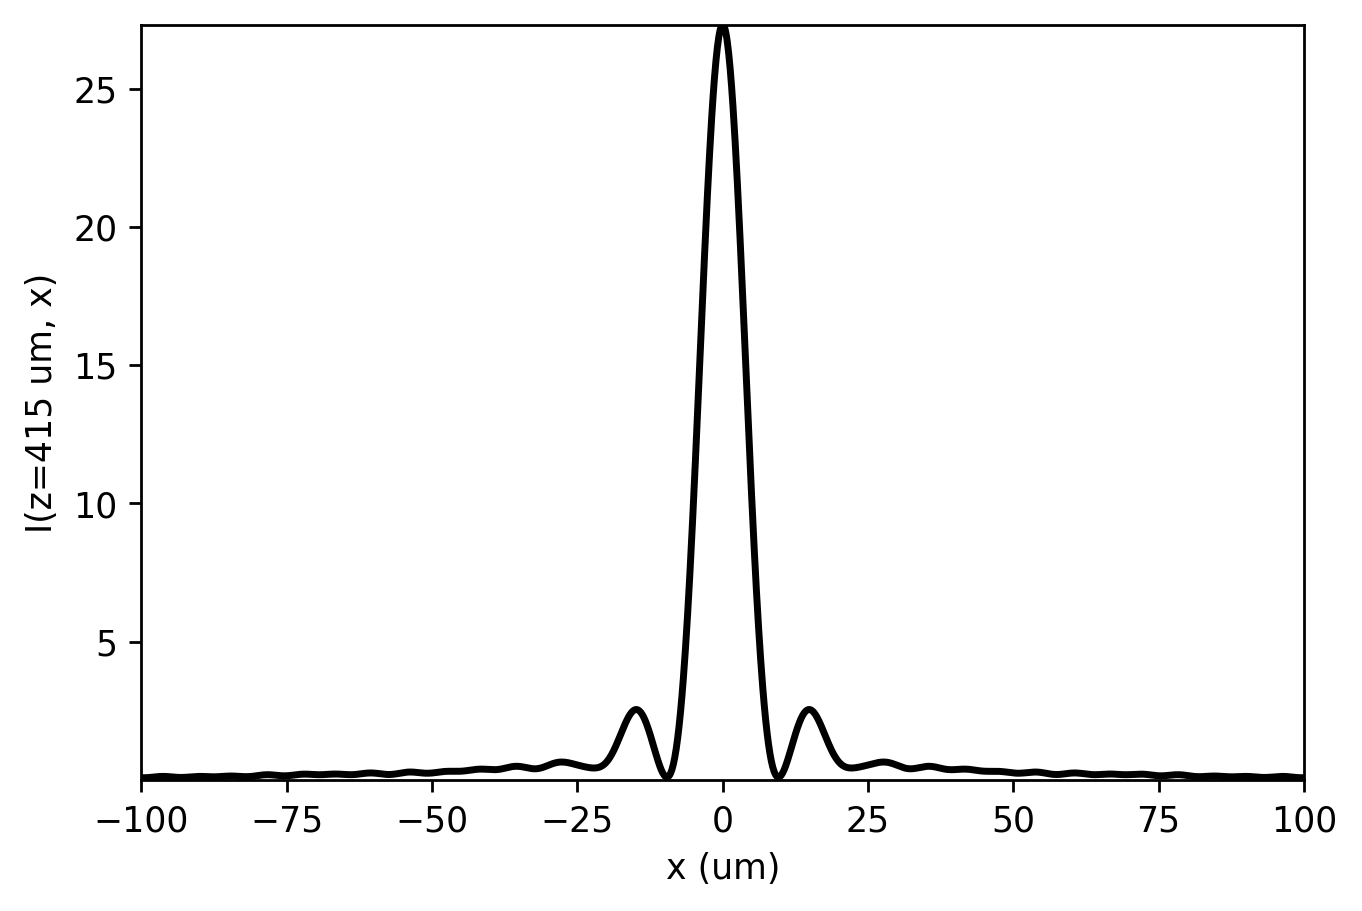

In [37]:
lente2.profile_transversal(kind='intensity', logarithm=False, z0=z_f)
plt.xlim(-100, 100)


### Videos of the XZ profiles

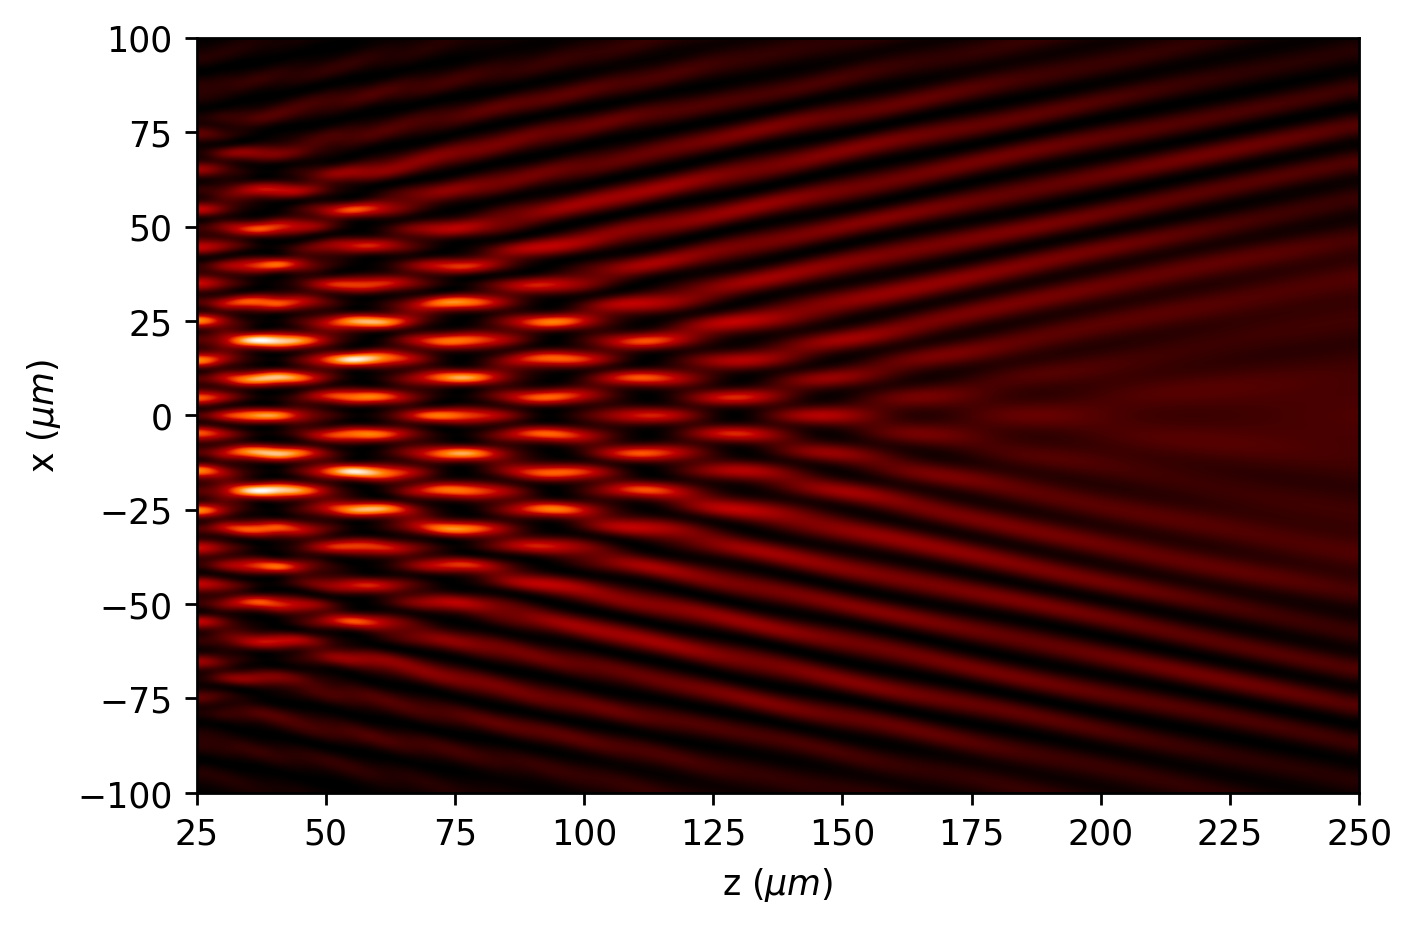

In [38]:
filename = 'video_xz'

length = 200 * um
wavelength = 5 * um
period = 25 * um
z_talbot = 2 * period**2 / wavelength
x0 = np.linspace(-length / 2, length / 2, 256)
z0 = np.linspace(25 * um, 1 * z_talbot, 64)

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=-100 * um, w0=100 * um, theta=0 * degrees)

t1 = Scalar_mask_X(x0, wavelength)
t1.ronchi_grating(x0=0 * um, period=10 * um, fill_factor=0.5)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(t1 * u0)
u1.RS()

u1.draw(kind='intensity',
        logarithm=False,
        normalize='maximum',
        draw_borders=True,
        filename='')


In [39]:
seconds = 1.
u1.video(kind='intensity',
         logarithm=True,
         normalize=False,
         time_video=10 * seconds,
         frames_reduction=5,
         filename='creating_video.mp4',
         dpi=300)


## Visualizing fields using interactive tools

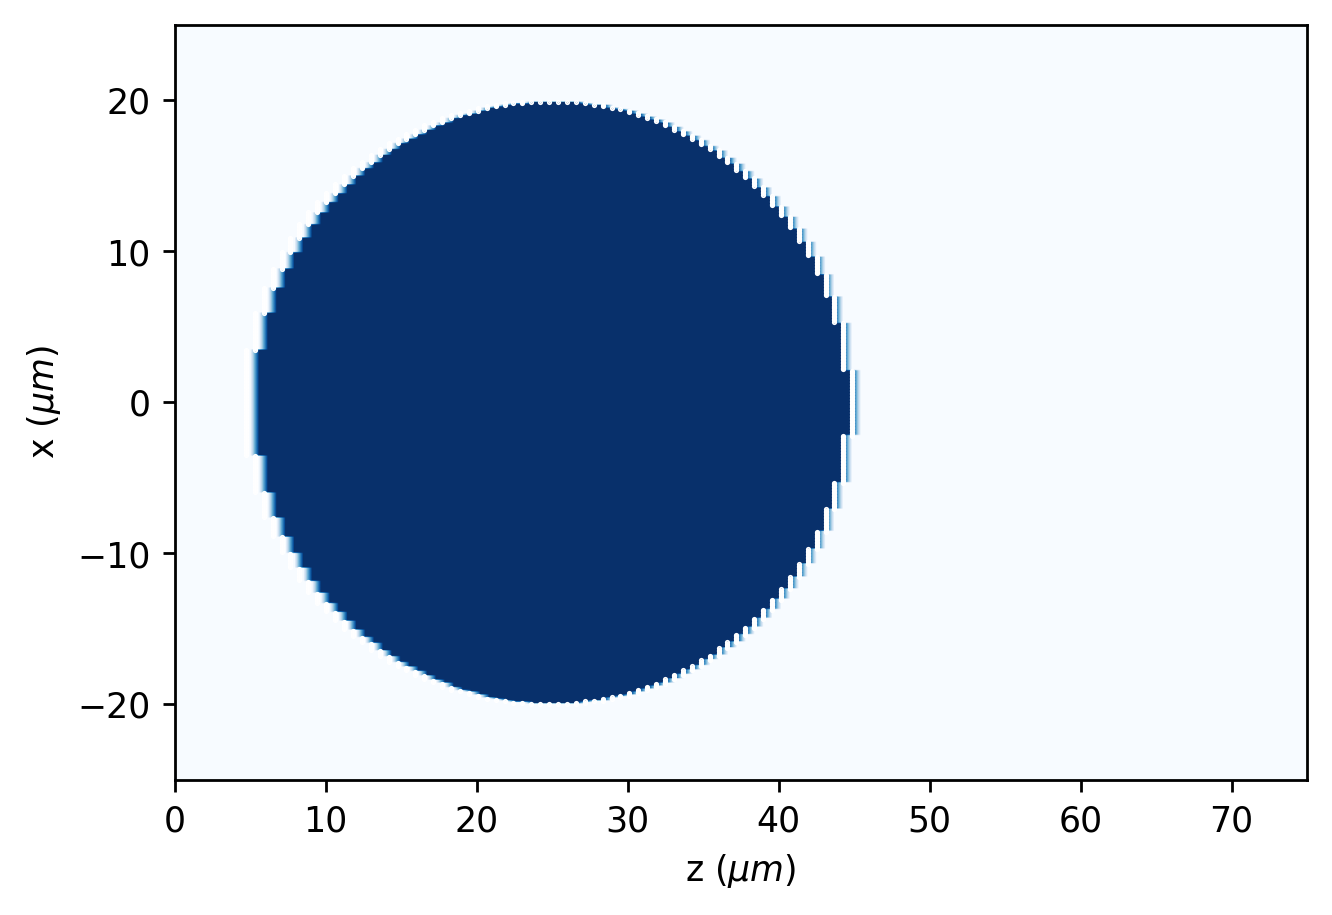

In [40]:
x0 = np.linspace(-25 * um, 25 * um, 512)
z0 = np.linspace(0 * um, 75 * um, 128)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)
u1.sphere(r0=(0 * um, 25 * um),
          radius=(20 * um, 20 * um),
          refraction_index=1.5)
u1.draw_refraction_index(scale='scaled')

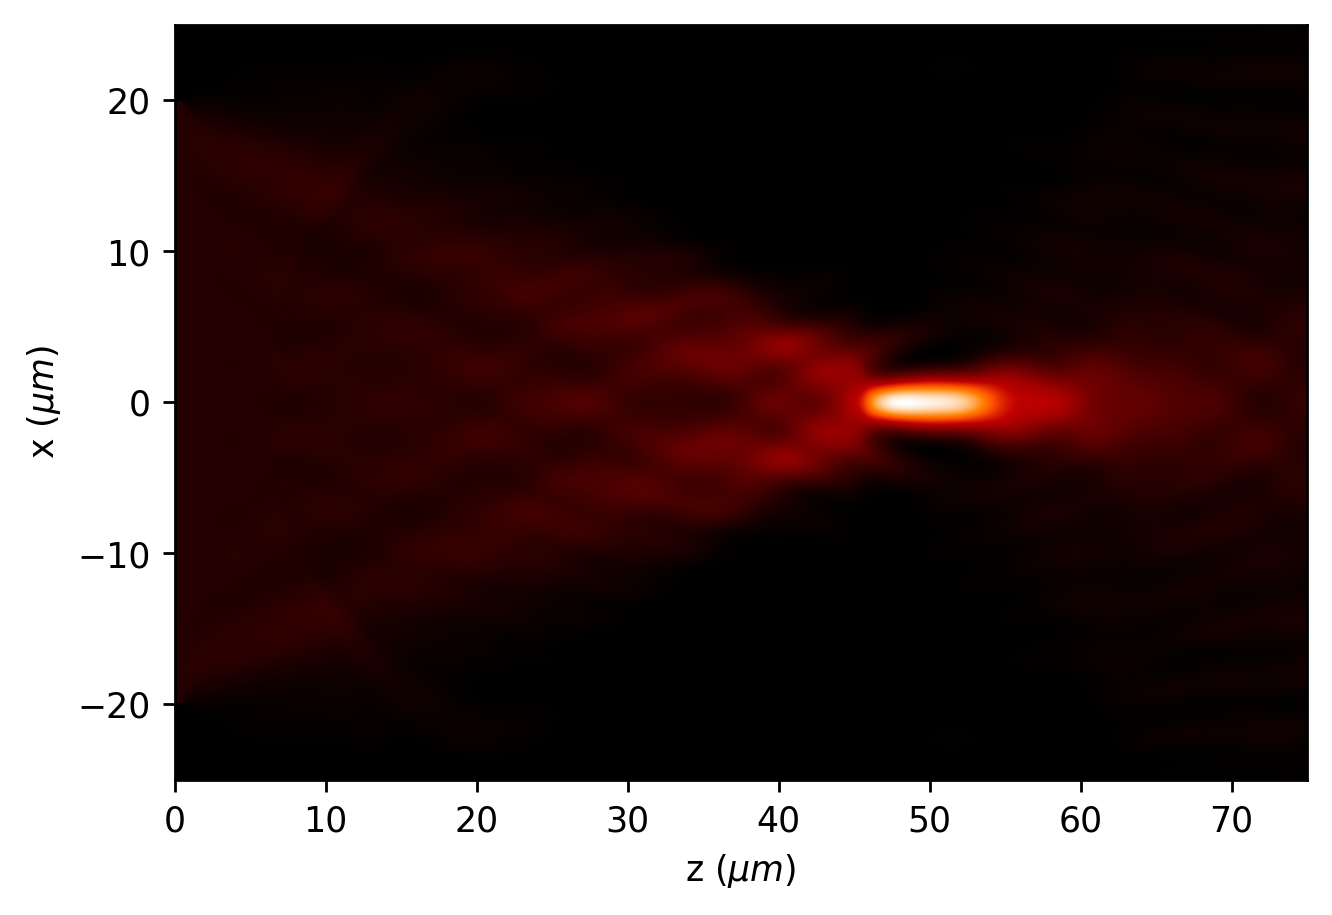

In [41]:
u1.WPM(verbose=False)
u1.draw(scale='scaled')

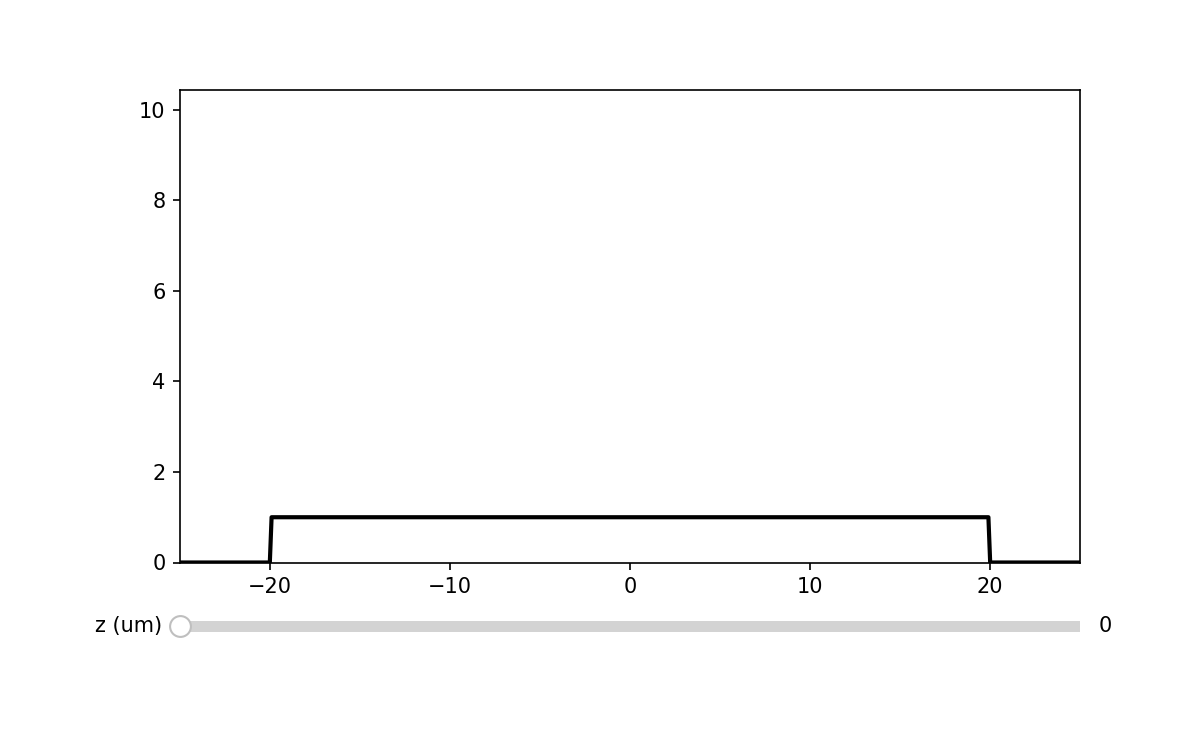

In [45]:
%matplotlib widget
rcParams['figure.dpi']=150
u1.draw_profiles_interactive(kind='intensity');

In [46]:
%matplotlib inline